In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import defaultdict

In [419]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [437]:
doc = nlp('I like all movies of Maria Ozawa and Tom Hank')
print([(X.text, X.label_) for X in doc.ents])

[('Maria Ozawa', 'PERSON'), ('Tom Hank', 'PERSON')]


# Explore data

In [9]:
with open("../datasets/NL2SparQL4NLU.train.conll.txt") as f:
    content = f.read().strip('\n').split('\n\n')
    
lengths = []
for sentence in content:
    sentence = sentence.split('\n')
    lengths.append(len(sentence))
    

print("Average length of sentences: {:.3f}".format(np.mean(np.array(lengths))))

Average length of sentences: 6.427


In [11]:
concept_counter

defaultdict(float,
            {'O': 15391.0,
             'character.name': 97.0,
             'movie.name': 3157.0,
             'actor.name': 437.0,
             'person.name': 280.0,
             'director.name': 455.0,
             'movie.release_date': 201.0,
             'movie.location': 21.0,
             'producer.name': 336.0,
             'country.name': 212.0,
             'movie.genre': 98.0,
             'movie.language': 207.0,
             'rating.name': 240.0,
             'movie.subject': 247.0,
             'actor.type': 3.0,
             'actor.nationality': 6.0,
             'director.nationality': 2.0,
             'movie.gross_revenue': 34.0,
             'person.nationality': 2.0,
             'award.ceremony': 13.0,
             'movie.release_region': 10.0,
             'movie.description': 2.0,
             'movie.star_rating': 1.0,
             'award.category': 1.0})

In [10]:
word = []
concept_counter = defaultdict(float)
for sentence in content:
    sentence = sentence.split('\n')
    for tp in sentence:
        tag = tp.split('\t')[1]
        concept_counter[tag.split('-')[-1]] += 1
        
print("Percentage of O concept: {:.3f}".format(concept_counter['O'] / sum([concept_counter[x] for x in concept_counter])))

Percentage of O concept: 0.717


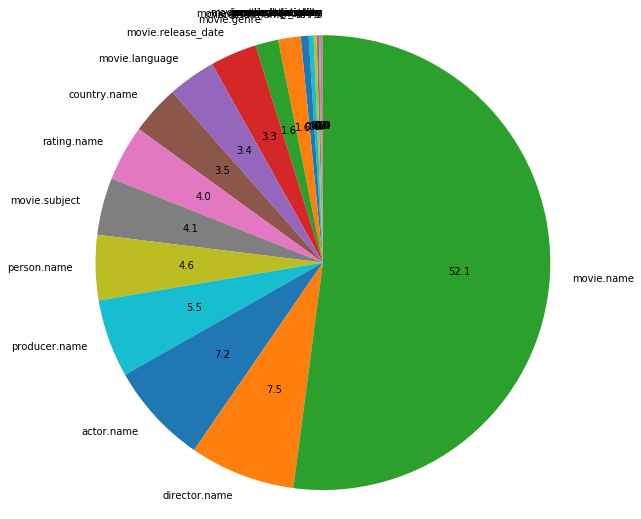

In [12]:
concepts = []
concept_count = []

o_counter = 0
for concept in concept_counter:
    if concept == 'O':
        o_counter += 1
        continue
    concepts.append(concept)
    concept_count.append(concept_counter[concept])
concepts, concept_count = zip(*sorted(list(zip(concepts, concept_count)), key=lambda x: x[1]))

figureObject, axesObject = plt.subplots(figsize=(9,9))

# Draw the pie chart

axesObject.pie(concept_count, labels=concepts, autopct='%1.1f', startangle=90, labeldistance=1.1)


# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 
plt.show()

# Get results

In [20]:
import glob, os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

working_dir = "../baseline/"

result = dict()
for file in glob.glob(os.path.join(working_dir, 'result/score_pred*.txt')):
    name = os.path.basename(file)
    method, ngram = name[11:].split('.')[0].split('-')
    with open(file) as f:
        f.readline()    
        result[method + '-' + ngram] = f.readline()[-6:-1]
#         print("\tMethod {} :\tF1 score {}".format(method, f.readline()[-6:]))
    #print(f)

In [22]:
f1_scores = defaultdict(list)
method_names = ["absolute", "katz", "kneser_ney", "presmoothed", "unsmoothed", "witten_bell"]
ngrams = ["2", "3", "4", "5"]
for method in method_names:
    print(method, end= ' &')
    for ngram in ngrams:
        f1_scores[method].append(float(result[method+'-'+ngram]))
        print(result[method+'-'+ngram], end=' &')
    print()

absolute &76.37 &75.67 &76.19 &76.15 &
katz &75.89 &74.11 &73.26 &63.33 &
kneser_ney &76.27 &75.67 &76.19 &76.16 &
presmoothed &76.27 &67.95 &67.01 &66.89 &
unsmoothed &76.21 &75.52 &76.00 &76.05 &
witten_bell &76.37 &75.58 &76.22 &76.32 &


C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


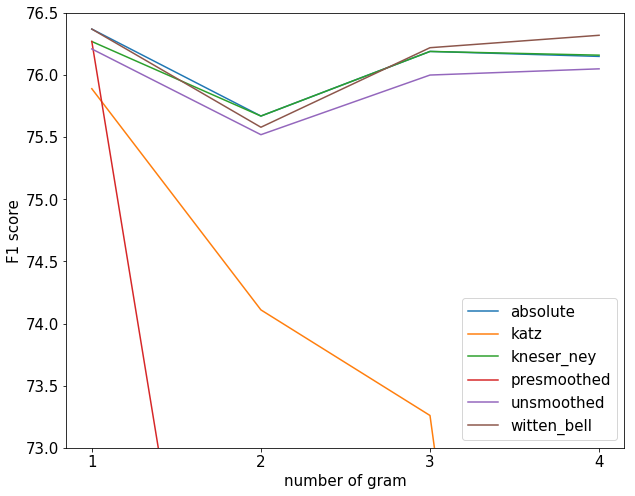

In [23]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

x = np.arange(1, 5, 1)
ax.plot(x, f1_scores['absolute'], label='absolute')
ax.plot(x, f1_scores['katz'], label='katz')
ax.plot(x, f1_scores['kneser_ney'], label='kneser_ney')
ax.plot(x, f1_scores['presmoothed'], label='presmoothed')
ax.plot(x, f1_scores['unsmoothed'], label='unsmoothed')
ax.plot(x, f1_scores['witten_bell'], label='witten_bell')
ax.set_ylim([73,76.5])
plt.xticks([1,2,3,4])
plt.xlabel('number of gram')
plt.ylabel('F1 score')
ax.legend(prop={'size': 15})

In [24]:
f1_scores['absolute']

[76.37, 75.67, 76.19, 76.15]

In [79]:
t='''       actor.name: precision:  76.19%; recall:  80.00%; FB1:  78.05  84
actor.nationality: precision: 100.00%; recall: 100.00%; FB1: 100.00  1
       actor.type: precision: 100.00%; recall: 100.00%; FB1: 100.00  2
   award.category: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
   award.ceremony: precision:  42.86%; recall:  42.86%; FB1:  42.86  7
   character.name: precision:  61.54%; recall:  53.33%; FB1:  57.14  13
     country.name: precision:  61.97%; recall:  70.97%; FB1:  66.17  71
    director.name: precision:  62.12%; recall:  50.62%; FB1:  55.78  66
director.nationality: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
      movie.genre: precision:  90.62%; recall:  80.56%; FB1:  85.29  32
movie.gross_revenue: precision:  50.00%; recall: 100.00%; FB1:  66.67  10
   movie.language: precision:  77.19%; recall:  63.77%; FB1:  69.84  57
   movie.location: precision:  50.00%; recall:  28.57%; FB1:  36.36  4
       movie.name: precision:  86.61%; recall:  82.03%; FB1:  84.26  448
movie.release_date: precision:  75.86%; recall:  75.86%; FB1:  75.86  29
movie.release_region: precision:  50.00%; recall:  25.00%; FB1:  33.33  2
movie.star_rating: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
    movie.subject: precision:  72.09%; recall:  70.45%; FB1:  71.26  43
       movie.type: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
      person.name: precision:  48.78%; recall:  58.82%; FB1:  53.33  41
    producer.name: precision:  78.69%; recall:  65.75%; FB1:  71.64  61
      rating.name: precision:  93.55%; recall:  95.08%; FB1:  94.31  62
'''

In [96]:
for tmp in t.split('\n')[:-1]:
    tmp = tmp.split(':')
    print(tmp[0], end='&')
    print(tmp[2][:-9] , end='&')
    print(tmp[3][:-6] , end='&')
    print(tmp[4][:6] + '\\\\')

       actor.name&  76.19&  80.00&  78.0\\
actor.nationality& 100.00& 100.00& 100.0\\
       actor.type& 100.00& 100.00& 100.0\\
   award.category&   0.00&   0.00&   0.0\\
   award.ceremony&  42.86&  42.86&  42.8\\
   character.name&  61.54&  53.33&  57.1\\
     country.name&  61.97&  70.97&  66.1\\
    director.name&  62.12&  50.62&  55.7\\
director.nationality&   0.00&   0.00&   0.0\\
      movie.genre&  90.62&  80.56&  85.2\\
movie.gross_revenue&  50.00& 100.00&  66.6\\
   movie.language&  77.19&  63.77&  69.8\\
   movie.location&  50.00&  28.57&  36.3\\
       movie.name&  86.61&  82.03&  84.2\\
movie.release_date&  75.86&  75.86&  75.8\\
movie.release_region&  50.00&  25.00&  33.3\\
movie.star_rating&   0.00&   0.00&   0.0\\
    movie.subject&  72.09&  70.45&  71.2\\
       movie.type&   0.00&   0.00&   0.0\\
      person.name&  48.78&  58.82&  53.3\\
    producer.name&  78.69&  65.75&  71.6\\
      rating.name&  93.55&  95.08&  94.3\\
